## Model simuleren: Krachtenbalans

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

In [1]:
# %load load_libs.py
%matplotlib inline

# Importeren van functionaliteiten
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


In [2]:
%aimport force
functie_afgeleiden = force.model_afgeleiden

## Model simuleren

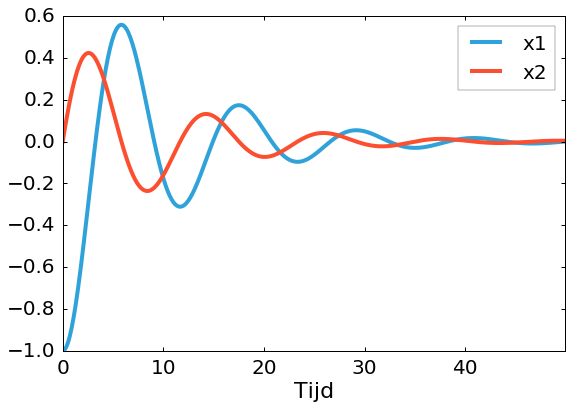

In [3]:
df = general_functions.model(
    np.arange(0, 50, 0.1), # tijdstappen
    [-1, 0], # initiële condities
    ['x1','x2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    b=0.2, m=1, k=0.3, Fex=0.)

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

## Impact initiële conditie en input

In [4]:
def interactive_model(x1, x2):
    general_functions.model(
        np.arange(0, 50, 0.1), # tijdstappen
        [x1, x2], # initiële condities
        ['x1','x2'], # namen variabelen
        functie_afgeleiden, # naam functie afgeleiden
        returnDataFrame=False, plotresults=True,
        # vanaf hier: functie specifieke parameters
        b=0.2, m=1, k=0.3, Fex=0.)

<function __main__.interactive_model>

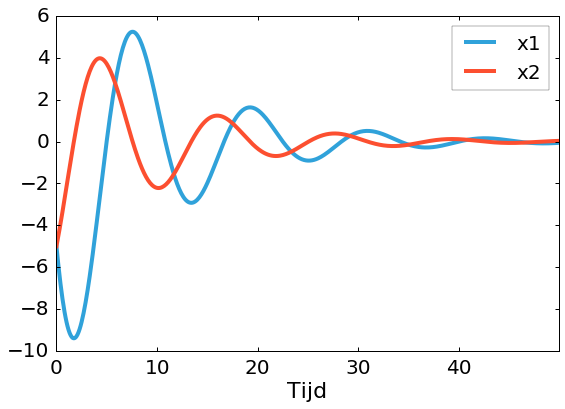

In [5]:
interact(interactive_model,
         x1=FloatSlider(value=-5, min=-10, max=10, step=1, description='x1', continuous_update=False),
         x2=FloatSlider(value=-5, min=-10, max=10, step=1, description='x1', continuous_update=False))

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

## Impact parameters

<function general_functions.model>

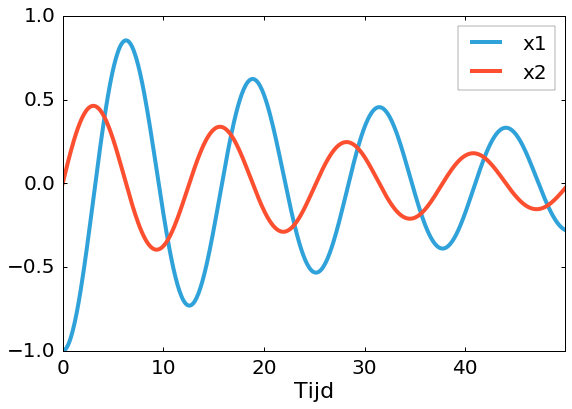

In [6]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0., 50, 0.1)),
         init=fixed([-1, 0]), varnames=fixed(['x1','x2']),
         f=fixed(functie_afgeleiden),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         b=FloatSlider(value=0.1, min=0., max=0.5, step=0.01, name='b', continuous_update=False),
         m=FloatSlider(value=2, min=0., max=5., step=0.1, name='m', continuous_update=False),
         k=FloatSlider(value=0.5, min=0., max=1., step=0.1, name='k', continuous_update=False),
         Fex=fixed(0))

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

# sensitiviteit

<function general_functions.sensitiviteit>

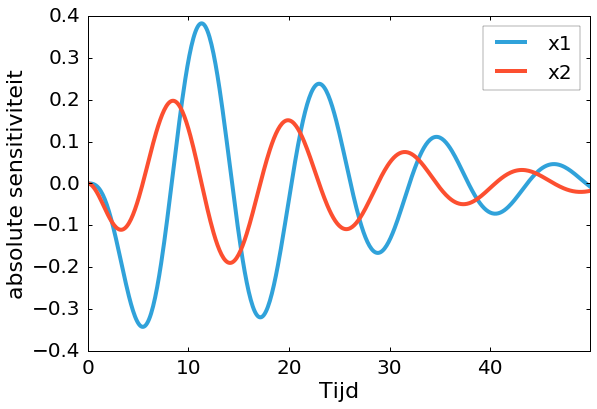

In [7]:
interact(general_functions.sensitiviteit,
    tijdstappen=fixed(np.arange(0, 50, 0.1)), # tijdstappen
    init = fixed([-1, 0]), # initiële condities
    varnames = fixed(['x1','x2']), # namen variabelen
    f = fixed(functie_afgeleiden), # naam functie afgeleiden
    parameternaam=ToggleButtons(options=['b', 'm', 'k', 'Fex']),
    log_perturbatie = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    soort=ToggleButtons(options=[
            'absolute sensitiviteit', 'relatieve sensitiviteit parameter',
            'relatieve sensitiviteit variabele','relatieve totale sensitiviteit']),
    # vanaf hier: functie specifieke parameters
    b=fixed(0.2), m=fixed(1), k=fixed(0.3), Fex=fixed(0.))

# Calibratie

In [8]:
model_name = "force"
with open(os.path.join(os.curdir, "data", model_name+"_functioncall.txt"), "r") as text_file:
    print(text_file.read())

general_functions.model(
    np.arange(0, 50, 0.5), # tijdstappen
    [-1, 0], # initiële condities
    ['x1','x2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    b=0.2, m=1, k=0.3, Fex=0.)


In [9]:
noise_level = 0.5
thepath = os.path.join(os.curdir, "data", model_name+"_data_noisy_{}.csv".format(noise_level))
df_noisy = pd.read_csv(thepath, index_col=0)

In [10]:
def sim_model(args):
    b, k = args
    sim = general_functions.model(
        np.arange(0, 50, 0.5), # tijdstappen
        [-1, 0], # initiële condities
        ['x1','x2'], # namen variabelen
        functie_afgeleiden, # naam functie afgeleiden
        returnDataFrame=True, plotresults=False,
        # vanaf hier: functie specifieke parameters
        b=b, m=1., k=k, Fex=0.)
    return sim

def optimizer(args, obj_func=general_functions.sse, data=df_noisy):
    sim = sim_model(args)
    return obj_func(sim, data)

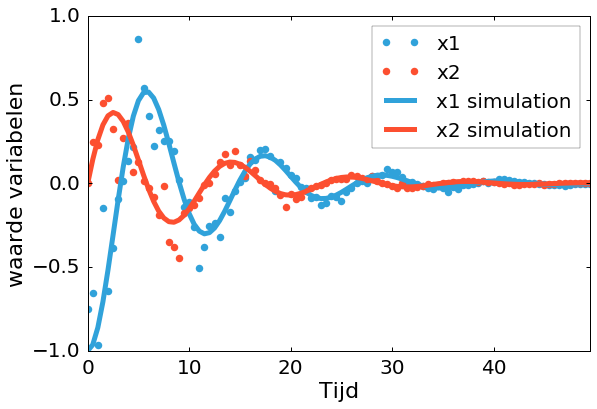

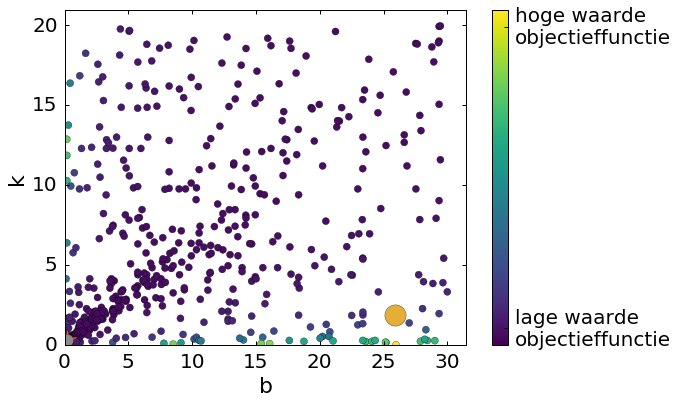

In [12]:
x0 = [.3, .2]
parameters,results = general_functions.track_calib(optimizer,
    x0, param_names=['b', 'k'], method='Nelder-Mead', tol=1e-4)
interact(general_functions.plot_calib,
         parameters=fixed(parameters), results=fixed(results),
         i=IntSlider(value=0, min=0, max=parameters.shape[0]-1, step=1, continuous_update=False),
         data=fixed(df_noisy), sim_model=fixed(sim_model))
#general_functions.plot_calib(parameters, results, parameters.shape[0]-1, df_noisy)

/home/jos/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/jos/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


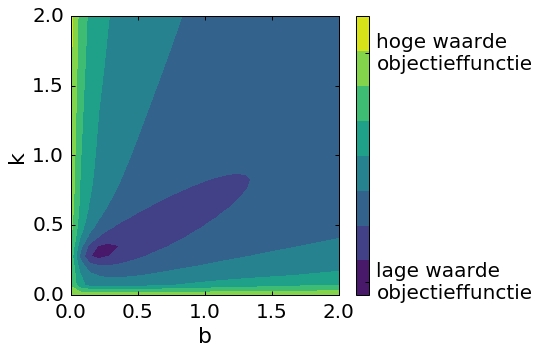

In [13]:
general_functions.plot_contour_force(optimizer)